In [56]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from ephys import core
from ephys import clust
from ephys import events
from ephys import rasters
import os
import scipy as sp
#import get_STA
loc_dat = '/home/AD/tsheehan/data/grid_data/'
import pickle
matplotlib.rcParams.update({'font.size': 18})

In [3]:
#loc_dat1 = loc_dat + 'spikes.pickle'
loc_dat1 = loc_dat + 'for_tim_spikes.pickle'
fid1 = open(loc_dat1,'rb')
spks = pickle.load(fid1)
#loc_dat2 = loc_dat + 'trials.pickle'
loc_dat2 = loc_dat + 'for_tim.pickle'
fid2 = open(loc_dat2,'rb')
trials = pickle.load(fid2)

In [8]:
trials

,time_samples,recording,stimulus,stimulus_end,response,response_time,consequence,correct,position,stim_points,x_loc,y_loc
0,124985,0,-3d984375_2d421875,145070,NaN,NaN,NaN,NaN,"[-3.984375, 2.421875]","[-3.984375, 2.421875]",-3.984375,2.421875
1,170043,0,-3d671875_-5d859375,190129,NaN,NaN,NaN,NaN,"[-3.671875, -5.859375]","[-3.671875, -5.859375]",-3.671875,-5.859375
2,216055,0,-2d734375_-14d296875,236141,NaN,NaN,NaN,NaN,"[-2.734375, -14.296875]","[-2.734375, -14.296875]",-2.734375,-14.296875
3,260461,0,-2d890625_-0d390625,280547,NaN,NaN,NaN,NaN,"[-2.890625, -0.390625]","[-2.890625, -0.390625]",-2.890625,-0.390625
4,301475,0,-4d140625_3d359375,321560,NaN,NaN,NaN,NaN,"[-4.140625, 3.359375]","[-4.140625, 3.359375]",-4.140625,3.359375
5,346918,0,-4d609375_-11d484375,367004,NaN,NaN,NaN,NaN,"[-4.609375, -11.484375]","[-4.609375, -11.484375]",-4.609375,-11.484375
6,393344,0,-3d828125_-4d140625,413430,NaN,NaN,NaN,NaN,"[-3.828125, -4.140625]","[-3.828125, -4.140625]",-3.828125,-4.140625
7,438522,0,-3d203125_-8d359375,458608,NaN,NaN,NaN,NaN,"[-3.203125, -8.359375]","[-3.203125, -8.359375]",-3.203125,-8.359375
8,482151,0,-4d140625_4d921875,502237,NaN,NaN,NaN,NaN,"[-4.140625, 4.921875]","[-4.140625, 4.921875]",-4.140625,4.921875
9,528090,0,-2d578125_-5d859375,548176,NaN,NaN,NaN,NaN,"[-2.578125, -5.859375]","[-2.578125, -5.859375]",-2.578125,-5.859375


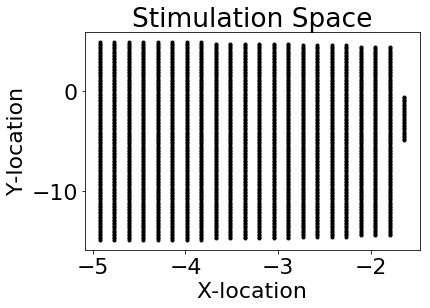

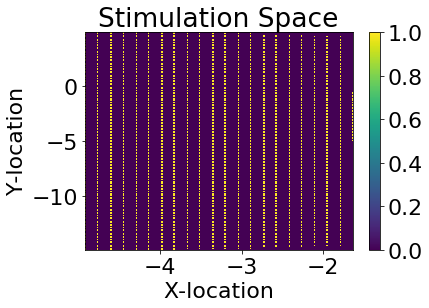

In [7]:
stim_labels = list(trials.stim_points)
stim_labels = np.stack(trials.stim_points)
plt.plot(stim_labels[:,0],stim_labels[:,1],'k.')
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('Stimulation Space')
plt.show()

plt.hist2d(stim_labels[:,0],stim_labels[:,1],bins=200)
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('Stimulation Space')
plt.colorbar()
plt.show()
#help(plt.hist2d:)

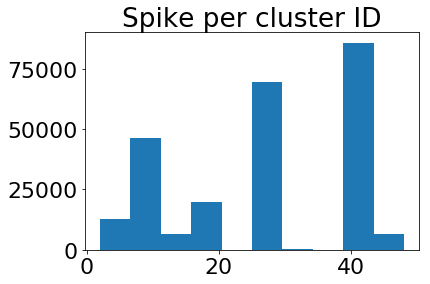

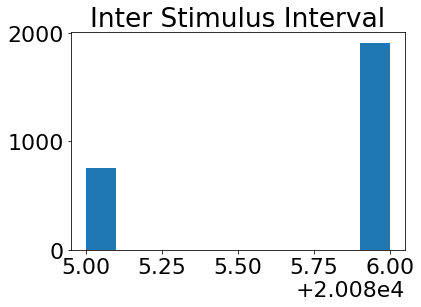

In [10]:
shift_st= 0*1000
shift_ed= 0*1000
st_time = list(trials.time_samples)
st_time = [i+shift_st for i in st_time]
end_time = list(trials.stimulus_end)
end_time = [i+shift_ed for i in end_time]
time_win = np.stack([st_time,end_time ])

clust = list(set(spks.cluster))
plt.hist(spks.cluster)
plt.title('Spike per cluster ID')
plt.show()
plt.title('Inter Stimulus Interval')
plt.hist(time_win[1,:]-time_win[0,:])
plt.show()

In [11]:
unit_use = clust[2]
my_spks = spks[spks.cluster==unit_use].time_samples
print ('Time Window Dim:', np.shape(time_win))
print('N Spikes Total:', len(my_spks))

Time Window Dim: (2, 2671)
N Spikes Total: 12216


In [12]:
def cnt_in_win(my_spks,win):
    n_trials = np.shape(win)[1]
    n_per_win = np.zeros(n_trials)
    for i in range(n_trials):
        this_win = win[:,i]
        n_this_win = np.sum((my_spks>this_win[0]) & (my_spks<this_win[1]))
        n_per_win[i] = n_this_win
        
    return n_per_win
spk_ev = cnt_in_win(my_spks,time_win)

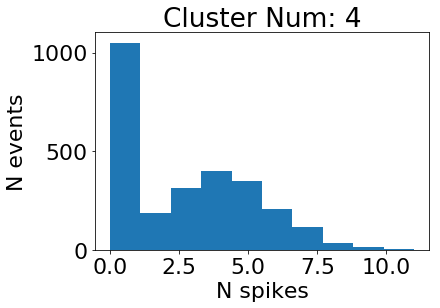

In [13]:
plt.hist(spk_ev)
plt.xlabel('N spikes')
plt.ylabel('N events')
plt.title('Cluster Num: ' + str(unit_use))
plt.show()

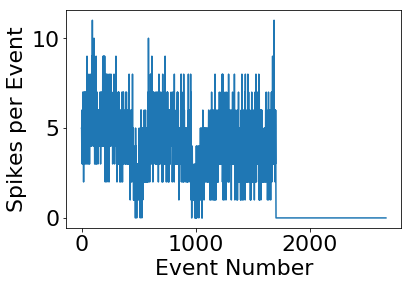

In [14]:
plt.plot(spk_ev)
plt.xlabel('Event Number')
plt.ylabel('Spikes per Event')
plt.show()

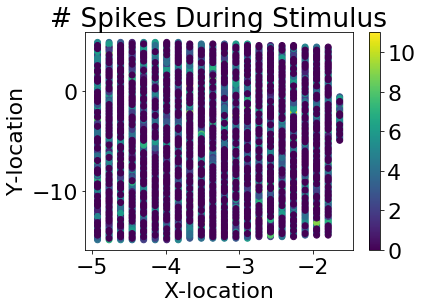

In [15]:
plt.scatter(stim_labels[:,0],stim_labels[:,1],c=spk_ev)
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.title('# Spikes During Stimulus')
plt.colorbar()
plt.show()

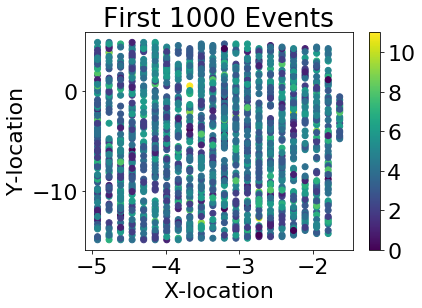

In [16]:
pt_view = np.arange(0,1500)
plt.scatter(stim_labels[pt_view,0],stim_labels[pt_view,1],c=spk_ev[pt_view])
plt.colorbar()
plt.title('First 1000 Events')
plt.xlabel('X-location')
plt.ylabel('Y-location')
plt.show()

# Attempt Scattered Interpolation

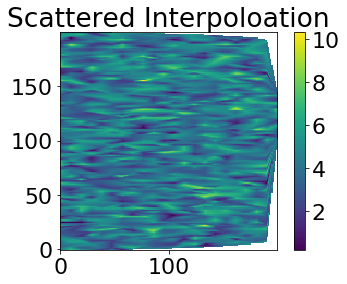

In [23]:
from matplotlib.mlab import griddata
numIndexes = 200
xi = np.linspace(np.min(stim_labels[pt_view,0]), np.max(stim_labels[pt_view,0]),numIndexes)
yi = np.linspace(np.min(stim_labels[pt_view,1]), np.max(stim_labels[pt_view,1]),numIndexes)
DEM = griddata(stim_labels[pt_view,0], stim_labels[pt_view,1], spk_ev[pt_view], xi, yi,interp='linear')
plt.imshow(DEM,origin='lower')#,cmap ='RdYlGn_r'
plt.title('Scattered Interpoloation')
plt.colorbar()
plt.show()

In [24]:
def summarize_unit(spks,clust_use,trials,ev_use,ev_bump=[0,0],numIndexes = 200):
    clust = list(set(spks.cluster))
    unit_use = clust[clust_use]
    my_spks = spks[spks.cluster==unit_use].time_samples

    stim_labels = list(trials.stim_points)
    stim_labels = np.stack(trials.stim_points)
    shift_st= ev_bump[0]*1000
    shift_ed= ev_bump[1]*1000
    st_time = list(trials.time_samples)
    st_time = [i+shift_st for i in st_time]
    end_time = list(trials.stimulus_end)
    end_time = [i+shift_ed for i in end_time]
    time_win = np.stack([st_time,end_time ])
    spk_ev = cnt_in_win(my_spks,time_win)
    #pt_view = ev_use
    
    plt.figure(figsize=(8,8))
    plt.subplot(2,2,1)
    plt.hist(spk_ev[ev_use])
    plt.xlabel('N spikes')
    plt.ylabel('N events')
    plt.title('Cluster Num: ' + str(unit_use))

    plt.subplot(2,2,2)
    plt.plot(spk_ev[ev_use])
    plt.xlabel('Event Number')
    plt.ylabel('Spikes per Event')
    
    plt.subplot(2,2,3)

    plt.scatter(stim_labels[ev_use,0],stim_labels[ev_use,1],c=spk_ev[ev_use],alpha=0.4,marker='s',cmap ='YlOrRd',s=50)
    plt.colorbar()
    plt.title('First '+ str(ev_use[-1]+1)+' Events')
    plt.xlabel('X-location')
    plt.ylabel('Y-location')

    plt.subplot(2,2,4)

    xi = np.linspace(np.min(stim_labels[ev_use,0]), np.max(stim_labels[ev_use,0]),numIndexes)
    yi = np.linspace(np.min(stim_labels[ev_use,1]), np.max(stim_labels[ev_use,1]),numIndexes)
    DEM = griddata(stim_labels[ev_use,0], stim_labels[ev_use,1], spk_ev[ev_use], xi, yi,interp='linear')
    plt.imshow(DEM,origin='lower')#,cmap ='RdYlGn_r'
    plt.title('Scattered Interpoloation')
    plt.colorbar()

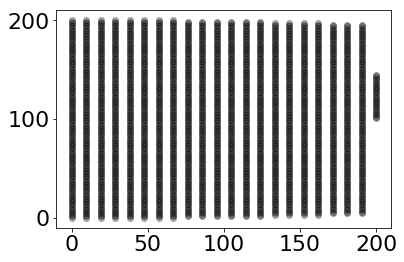

In [25]:
xArrayNormalized=stim_labels[:,0]/(np.max(stim_labels[:,0])-np.min(stim_labels[:,0]))
xArrayNormalized-=np.min(xArrayNormalized)
yArrayNormalized=stim_labels[:,1]/(np.max(stim_labels[:,1])-np.min(stim_labels[:,1]))
yArrayNormalized-=np.min(yArrayNormalized)
plt.scatter(numIndexes*xArrayNormalized,numIndexes*yArrayNormalized,color='k',alpha=0.29)

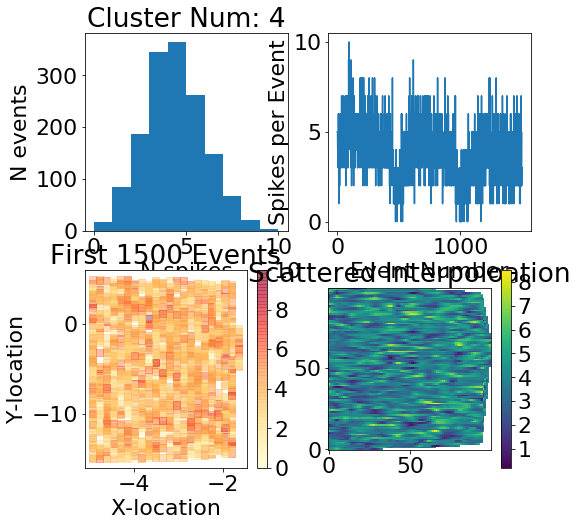

In [28]:
summarize_unit(spks,2,trials,np.arange(1500),ev_bump=[1,-1],numIndexes = 100)

# GET PSTH

In [29]:
# check time distribution of events
#trials
# GET PSTH for a given set of windows
def spks_in_win(spks,st_time,win_len):
    #st_time[st_time>len(spks)] = []
    st_time = np.delete(st_time,np.where(st_time>len(spks)))
    n_trials = len(st_time)
    PSTH = np.zeros((win_len,n_trials))
    for i in range(n_trials):
        this_win = np.arange(st_time[i],st_time[i]+win_len)
        PSTH[:,i] = spks[this_win]
    return PSTH

In [135]:
lTrial=1600
clust = list(set(spks.cluster))
unit_use = clust[5] #3
spk_times = np.array(spks[spks.cluster==unit_use].time_samples)
my_spikes = np.zeros(np.max(spk_times)+1,dtype=int)
my_spikes[spk_times] = int(1)
st_time = np.array(trials[:lTrial].time_samples)
print(unit_use)

10


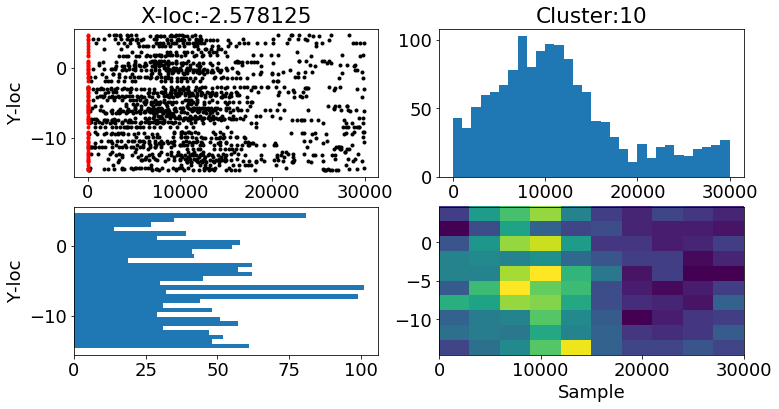

In [136]:
x_pts = stim_labels[:lTrial,0]
y_pts = stim_labels[:lTrial,1]
x_val = np.unique(x_pts)
y_val = np.unique(y_pts)

x_use = x_pts[14] # 6
pts_want = x_pts==x_use
PSTH = spks_in_win(my_spikes,st_time[pts_want],30*1000)

spk_loc = np.where(PSTH>=1)
val_pts_want = np.where(np.array(pts_want))

probe_y = y_pts[pts_want]
spk_loc_y = probe_y[spk_loc[1]]

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
plt.title('X-loc:' + str(x_use))
plt.plot(spk_loc[0],spk_loc_y,'k.')
plt.plot(np.zeros(sum(pts_want)),probe_y,'r.')
plt.ylabel('Y-loc')

plt.subplot(2,2,2)
plt.hist(spk_loc[0],30)
plt.title('Cluster:'+ str(unit_use))

plt.subplot(2,2,3)
plt.hist(spk_loc_y,30,orientation="horizontal")
plt.ylabel('Y-loc')

plt.subplot(2,2,4)
plt.hist2d(spk_loc[0],spk_loc_y)
plt.xlabel('Sample')
plt.show()

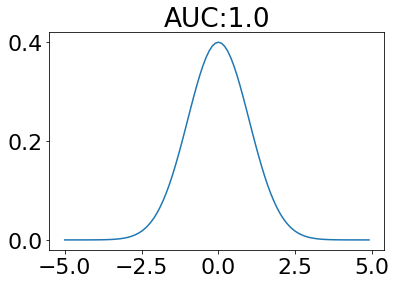

In [34]:
# create gaussian kernal
def gauss_val(x,sd=1,mu=0):
    y1 = -((x-mu)**2)/(2*sd**2)
    y = (2*np.pi*sd)**-0.5*np.exp(y1)
    return y
stp  = .1
x = np.arange(-5,5,stp)
gauss_kern = gauss_val(x)
area = np.sum(gauss_kern)*stp
plt.plot(x,gauss_kern)
plt.title('AUC:'+ str(round(area,4)))
plt.show()

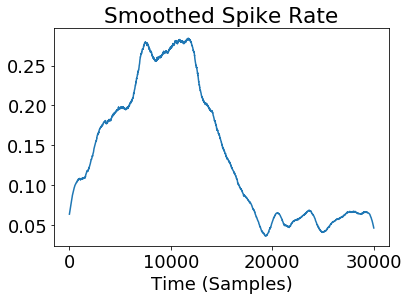

In [137]:
stp  = .02
x = np.arange(-10,10,.01)
gauss_kern = gauss_val(x,5)
conv_out = PSTH
for i in range(np.shape(PSTH)[1]):
    conv_out[:,i] = np.convolve(PSTH[:,i],gauss_kern,'same')
avg_conv_rate = np.mean(conv_out,1)
np.shape(avg_conv_rate)
plt.plot(avg_conv_rate)
plt.title('Smoothed Spike Rate')
plt.xlabel('Time (Samples)')
plt.show()

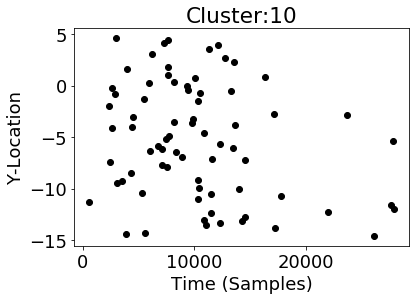

In [138]:
mx_time_ind = np.argmax(conv_out,0)

if 0:
    fit = np.polyfit(mx_time_ind,probe_y,1)
    fit_fn = np.poly1d(fit) 
    # fit_fn is now a function which takes in x and returns an estimate for y
    plt.plot(mx_time_ind,probe_y, 'yo', mx_time_ind, fit_fn(mx_time_ind), '--k')

plt.plot(mx_time_ind,probe_y,'ko')
plt.title('Cluster:'+ str(unit_use))
plt.ylabel('Y-Location')
plt.xlabel('Time (Samples)')
plt.show()

In [37]:
def get_msr_xy(trials,spks,kernal,t_use):
    stim_labels = list(trials.stim_points)
    stim_labels = np.stack(trials.stim_points)
    
    x_pts = stim_labels[:t_use,0]
    y_pts = stim_labels[:t_use,1]
    x_val = np.unique(x_pts)
    y_val = np.unique(y_pts)
    st_time = np.array(trials[:t_use].time_samples)
    #x_use = x_pts[14] # 6
    #pts_want = x_pts==x_use
    PSTH = spks_in_win(spks,st_time,30*1000)
    print(np.shape(PSTH))
    conv_out = PSTH
    for i in range(np.shape(PSTH)[1]):
        conv_out[:,i] = np.convolve(PSTH[:,i],kernal,'same')
    msr = np.argmax(conv_out,0)
    return msr

In [139]:
x = np.arange(-10,10,.01)
gauss_kern = gauss_val(x,5)
msr = get_msr_xy(trials,my_spikes,gauss_kern,lTrial)

(30000, 1600)


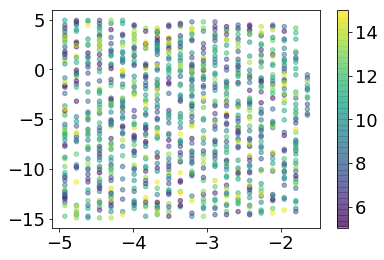

In [140]:
x_pts = stim_labels[:lTrial,0]
y_pts = stim_labels[:lTrial,1]
msr_view = msr
bad = (msr_view>15000) | (msr_view<5000)
plt.scatter(x_pts[bad == False],y_pts[bad == False],c=msr[bad == False]/1000,alpha=.5,s=20)
plt.colorbar()

plt.show()

# Get ISI

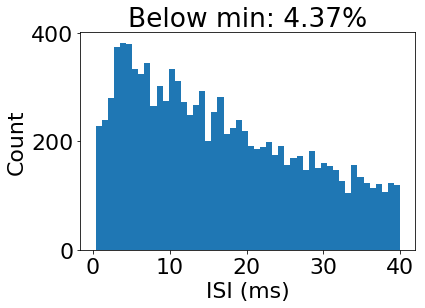

In [40]:
def get_ISI(spk_times):
    d_spk = spk_times[1:]-spk_times[:-1]
    return d_spk
min_thresh = 2*40 # 2 ms

ISI = get_ISI(spk_times)
ISI = ISI[ISI<40*40]
too_soon = np.round(np.mean(ISI<min_thresh)*100,2)
plt.hist(ISI/40,50)
plt.xlabel('ISI (ms)')
plt.ylabel('Count')
plt.title('Below min: ' + str(too_soon) + '%')
plt.show()

# Non-parametric testing
## 1) get null distribution of start points and look at PSTH
## 2) Bootstrap this distribution to get a standard deviation\
## 3) Use to determine statistics of auditory responses 

In [84]:
unit_use = clust[3] #3
spk_times = np.array(spks[spks.cluster==unit_use].time_samples)
my_spikes = np.zeros(np.max(spk_times)+1,dtype=int)
my_spikes[spk_times] = int(1)
st_time = np.array(trials[:lTrial].time_samples)
n_st_time = len(st_time)

In [104]:
def cluster_sum(spks,trials,clust_use=3,x_use=14):
    # trials
    stim_labels = list(trials.stim_points)
    stim_labels = np.stack(trials.stim_points)
    st_time = np.array(trials[:lTrial].time_samples)
    ed_time = np.array(trials[:lTrial].stimulus_end)
    stim_len = ed_time[0] - st_time[0]
    print(stim_len)
    #spikes
    clust = list(set(spks.cluster))
    unit_use = clust[clust_use] #3
    spk_times = np.array(spks[spks.cluster==unit_use].time_samples)
    my_spikes = np.zeros(np.max(spk_times)+1,dtype=int)
    my_spikes[spk_times] = int(1)
    st_time = np.array(trials[:lTrial].time_samples)
    # sort latent space
    x_pts = stim_labels[:lTrial,0]
    y_pts = stim_labels[:lTrial,1]
    x_val = np.unique(x_pts)
    y_val = np.unique(y_pts)
    # get PSTH
    x_use = x_pts[x_use] # 6
    pts_want = x_pts==x_use
    pre_offset = -10*1000
    PSTH = spks_in_win(my_spikes,st_time[pts_want]+pre_offset,40*1000)
    # sort by y-location
    spk_loc = np.where(PSTH>=1)
    spk_loc = [x+pre_offset for x in spk_loc]
    val_pts_want = np.where(np.array(pts_want))
    probe_y = y_pts[pts_want]
    #spk_loc_y = probe_y[spk_loc[1]] # Doesn't work with pre offset
    # ISI
    ISI = get_ISI(spk_times)
    ISI = ISI[ISI<40*40]
    too_soon = np.round(np.mean(ISI<min_thresh)*100,2)
    
    # plotting
    plt.figure(figsize=(6,4))
    plt.subplot(1,2,1)
    plt.hist(ISI/40,50)
    plt.xlabel('ISI (ms)')
    plt.ylabel('Count')
    plt.title('Below min: ' + str(too_soon) + '%')
    
    plt.subplot(1,2,2)
    plt.hist(spk_loc[0],30)
    yl = np.squeeze([plt.gca().get_ylim()])
    plt.plot([0, 0],yl,'r--')
    plt.plot([stim_len, stim_len],yl,'r--')
    plt.title('Cluster:'+ str(unit_use))
    
    

20085


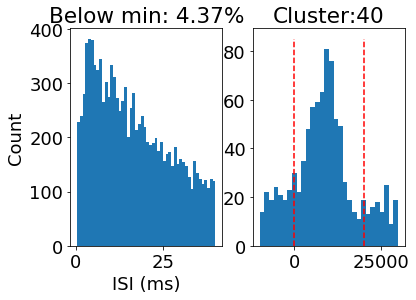

In [101]:
cluster_sum(spks,trials,clust_use = 3)

20085


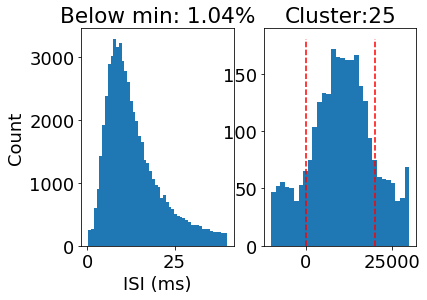

In [120]:
cluster_sum(spks,trials,clust_use = 13)